In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup

In [102]:
data = pd.read_csv(r"D:\\CGS616\\Project\\history_export_yash.txt", sep="|", header = None)
data.columns = ["Time", "URL"]

In [103]:
data['Time'] = pd.to_datetime(data['Time'])

In [104]:
data.index = data['Time']
del data['Time']
domainList = [0]*len(data)

In [105]:
headers = requests.utils.default_headers()
headers.update(
    {
        'User-Agent': 'Custom User Agent 1.0',
        'From': 'nsrivast@iitk.ac.in'  # Stick in your IITK email id
    }
)

In [106]:

for idx in range(len(data)):
    print(idx)
    url = data.URL[idx]
    if(len(url)>5):
        try:
            r = requests.get(url, headers=headers,timeout=60)
        except:
            r = ''
            pass
        if(type(r)!=str):
            soup = BeautifulSoup(r.text, 'lxml')
            if(len(soup('title'))>0):
                if(soup('title')[0].string is not None):
                    domainList[idx] = soup('title')[0].string.encode('utf-8').strip()     
                else:
                    domainList[idx] = "Null"
            else:
                domainList[idx] = "Null"
        else:
            domainList[idx] = "Null"

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

c:\Users\Yash Giri\anaconda3\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


932
933
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144
114

In [107]:
data.to_csv('chrome_history.csv')

In [108]:
data = pd.read_csv('chrome_history.csv')
data.Time = pd.to_datetime(data.Time)
data['Domain'] = domainList
docs = data['Domain'].unique()

In [109]:
data.head()

,Time,URL,Domain
0,2024-01-30 12:48:30,https://search.pclub.in/,b'Student Search | IITK'
1,2024-01-30 12:47:34,https://www.google.com/search?q=lenovo&oq=leno...,b'lenovo - Google Search'
2,2024-01-30 12:29:59,https://chat.openai.com/c/3e19de03-77e3-43a1-8...,b'ChatGPT'
3,2024-01-30 12:29:10,https://keep.google.com/u/0,b'Sign in - Google Accounts'
4,2024-01-30 12:29:10,https://keep.google.com/u/0/,b'Sign in - Google Accounts'


In [11]:
pip install stop-words

  Using cached stop-words-2018.7.23.tar.gz (31 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32918 sha256=71eef984e0e9f27e2fe51f5ec9663613003a18a092597ec7f04899a68ab2a62c
  Stored in directory: c:\users\yash giri\appdata\local\pip\cache\wheels\a3\2e\75\cb00ac68fe0eda6689c314cf87dee032f37bab4f9f4311d7fe
Successfully built stop-words
Note: you may need to restart the kernel to use updated packages.


In [110]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

In [111]:
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()


In [112]:
doc_set = docs.tolist()

In [113]:
texts = []

# loop through document list
for i in doc_set:
    try:
        i = i.decode('ascii')
        i.encode()
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)

        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
    
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
        # add tokens to list
        texts.append(stemmed_tokens)
    except AttributeError:
        texts.append([])
        pass
    except UnicodeDecodeError:
        texts.append([])
        pass

In [114]:
# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

In [115]:
# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=20)

In [116]:
ldamodel.print_topics(3)

[(0,
  '0.075*"googl" + 0.064*"search" + 0.022*"youtub" + 0.010*"kanpur" + 0.008*"beam" + 0.007*"harri" + 0.006*"potter" + 0.006*"nation" + 0.006*"india" + 0.005*"sign"'),
 (1,
  '0.086*"search" + 0.084*"googl" + 0.016*"youtub" + 0.016*"iitk" + 0.014*"napkin" + 0.011*"machin" + 0.011*"vend" + 0.009*"sanitari" + 0.008*"iit" + 0.006*"kanpur"'),
 (2,
  '0.011*"youtub" + 0.010*"download" + 0.008*"com" + 0.008*"2023" + 0.008*"india" + 0.007*"research" + 0.007*"support" + 0.006*"solv" + 0.006*"2024" + 0.006*"1"')]

In [117]:
ldamodel.get_topic_terms(0,10)

[(3, 0.07496066),
 (1, 0.06449424),
 (131, 0.021779286),
 (105, 0.010228002),
 (1315, 0.0076996163),
 (116, 0.0066282162),
 (119, 0.0060438174),
 (707, 0.0059562125),
 (232, 0.0058354856),
 (7, 0.0054465546)]

In [22]:
pip install wordcloud

     -------------------------------------- 300.0/300.0 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


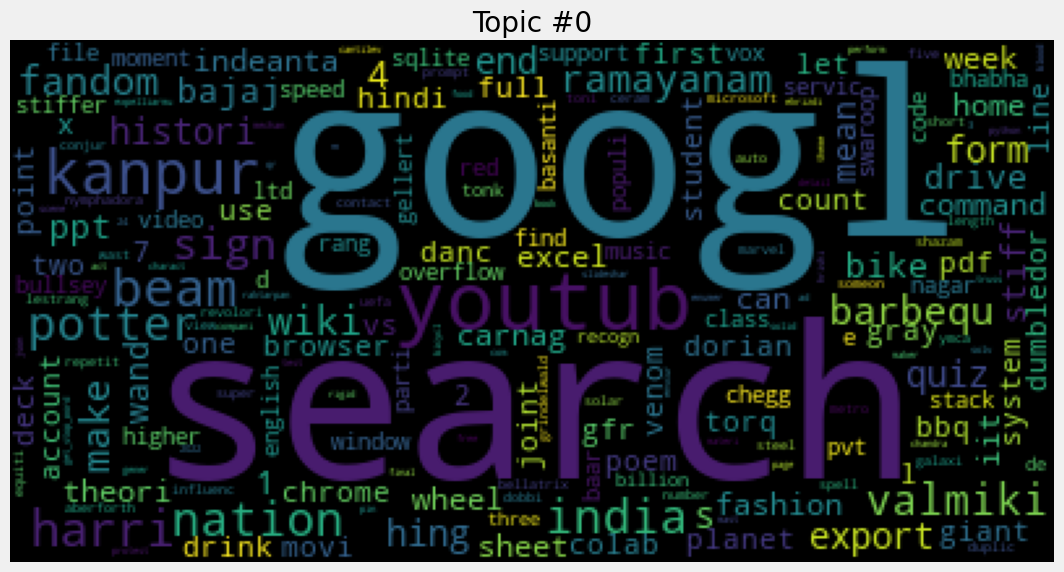

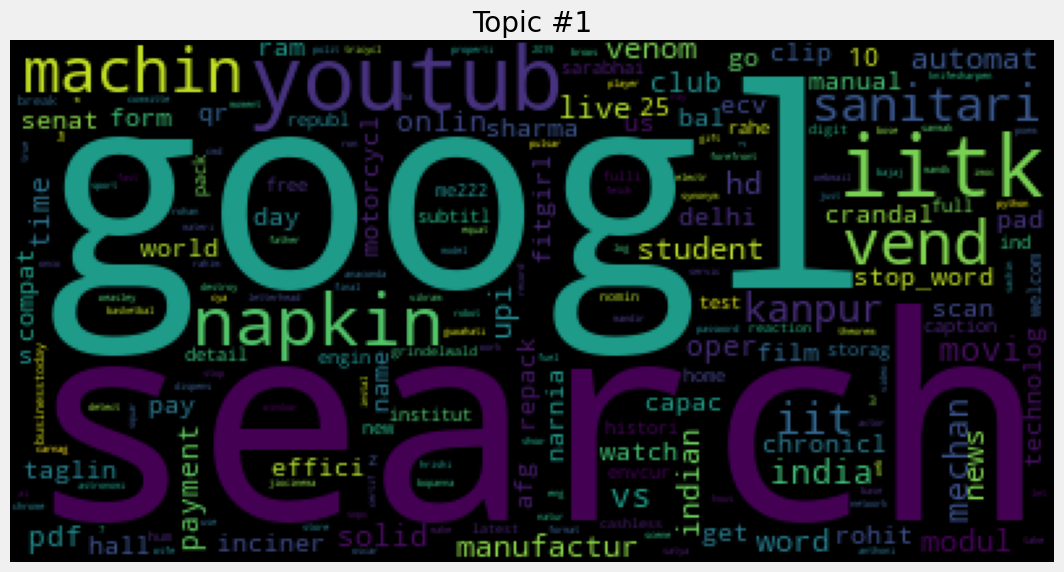

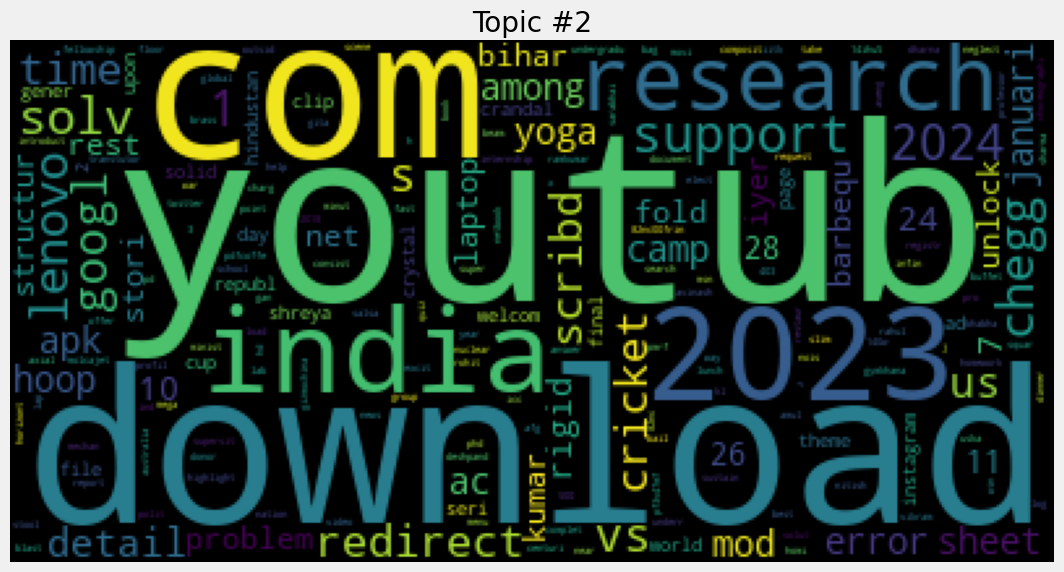

In [118]:
from wordcloud import WordCloud, STOPWORDS
for t in range(ldamodel.num_topics):
    plt.figure(figsize=(12,8))
    plt.imshow(WordCloud().fit_words(dict(ldamodel.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    #plt.savefig('topic #' + str(t) + '.png', bbox_inches='tight')
    plt.show()

In [119]:
topic = [0]*len(data)
for idx in range(len(data)):
    test_idx = doc_set.index(data.Domain[idx])
    probs = ldamodel[dictionary.doc2bow(texts[test_idx])]
    prs = [item for sublist in probs for item in sublist]
    topicProbs = []
    for i in probs:
        topicProbs.append(i[1])
    topic[idx] = np.argmax(np.asarray(topicProbs))

In [120]:
data['Topic'] = topic

In [121]:
data.head()

,Time,URL,Domain,Topic
0,2024-01-30 12:48:30,https://search.pclub.in/,b'Student Search | IITK',1
1,2024-01-30 12:47:34,https://www.google.com/search?q=lenovo&oq=leno...,b'lenovo - Google Search',1
2,2024-01-30 12:29:59,https://chat.openai.com/c/3e19de03-77e3-43a1-8...,b'ChatGPT',0
3,2024-01-30 12:29:10,https://keep.google.com/u/0,b'Sign in - Google Accounts',0
4,2024-01-30 12:29:10,https://keep.google.com/u/0/,b'Sign in - Google Accounts',0


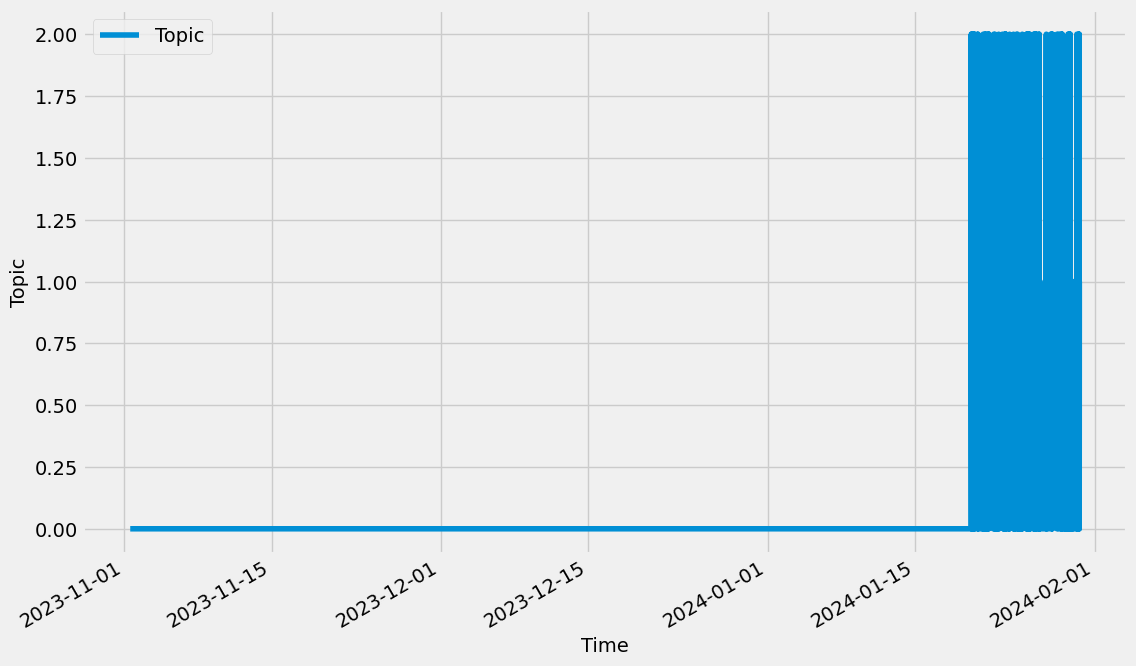

In [122]:
sorted_data = data.sort_values('Time')
plt.style.use('fivethirtyeight')
sorted_data.plot(x='Time', y='Topic', figsize=(12,8))
plt.ylabel('Topic')
plt.show()

In [123]:
cp_data = data

In [124]:
cp_data.head()

,Time,URL,Domain,Topic
0,2024-01-30 12:48:30,https://search.pclub.in/,b'Student Search | IITK',1
1,2024-01-30 12:47:34,https://www.google.com/search?q=lenovo&oq=leno...,b'lenovo - Google Search',1
2,2024-01-30 12:29:59,https://chat.openai.com/c/3e19de03-77e3-43a1-8...,b'ChatGPT',0
3,2024-01-30 12:29:10,https://keep.google.com/u/0,b'Sign in - Google Accounts',0
4,2024-01-30 12:29:10,https://keep.google.com/u/0/,b'Sign in - Google Accounts',0


In [125]:
cp_data['Time'] = pd.to_datetime(cp_data['Time'])
cp_data.index = cp_data['Time']
del cp_data['Time']
cp_data.head()

,URL,Domain,Topic
Time,,,
2024-01-30 12:48:30,https://search.pclub.in/,b'Student Search | IITK',1
2024-01-30 12:47:34,https://www.google.com/search?q=lenovo&oq=leno...,b'lenovo - Google Search',1
2024-01-30 12:29:59,https://chat.openai.com/c/3e19de03-77e3-43a1-8...,b'ChatGPT',0
2024-01-30 12:29:10,https://keep.google.com/u/0,b'Sign in - Google Accounts',0
2024-01-30 12:29:10,https://keep.google.com/u/0/,b'Sign in - Google Accounts',0


In [70]:
pip install panda

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for panda: filename=panda-0.3.1-py3-none-any.whl size=7245 sha256=e3fbc860204950fdb53ec6f92b85562a509a84ddf290a1aad4abeccfdc06c0b3
  Stored in directory: c:\users\yash giri\appdata\local\pip\cache\wheels\d1\81\6d\0bcd1ae53614a2da2cda0de1dced1fb83050422c7cf5213c32
Successfully built panda
Note: you may need to restart the kernel to use updated packages.


In [135]:
import numpy as np

occurrences = []
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for day in weekdays:
    tlist = cp_data[cp_data.index.day_name() == day].Topic.tolist()
    res = np.histogram(tlist, bins=[0, 1, 2, 3])
    occurrences.append(list(res[0]))


In [127]:
t0 = [0]*len(occurrences)
t1 = [0]*len(occurrences)
t2 = [0]*len(occurrences)

for d in range(len(occurrences)):
    t0[d] = occurrences[d][0]
    t1[d] = occurrences[d][1]
    t2[d] = occurrences[d][2]

cumt1 = [sum(x) for x in zip(t0, t1)]

In [60]:
pip install matplotlib 

Note: you may need to restart the kernel to use updated packages.


In [61]:
pip install set_matplotlib_close

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement set_matplotlib_close (from versions: none)
ERROR: No matching distribution found for set_matplotlib_close


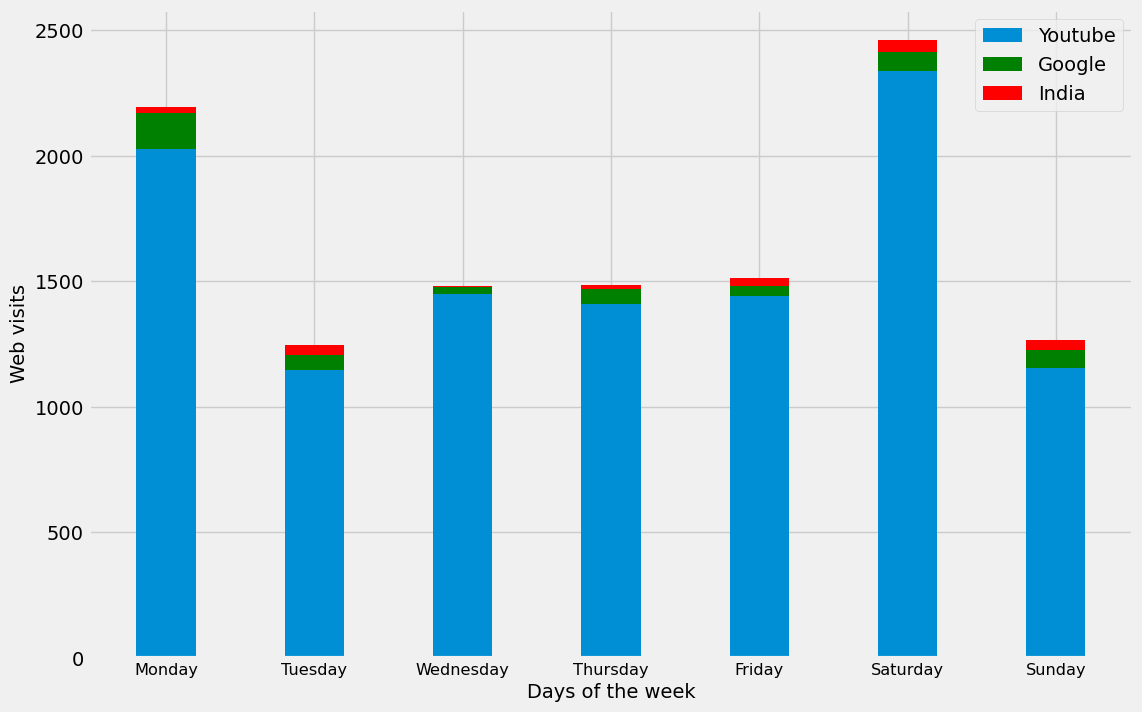

In [128]:
plt.figure(figsize=(12,8))
p0 = plt.bar(range(7), t0, 0.4, label='Youtube')
p1 = plt.bar(range(7), t1, 0.4,bottom=t0, color='green', label='Google')
p2 = plt.bar(range(7), t2, 0.4, bottom=cumt1, color='red', label='India')
plt.xticks(range(7), weekdays, size='small')
plt.xlabel('Days of the week')
plt.ylabel('Web visits')
plt.legend()
plt.show()

OPTION 1: HOURLY BASIS DISTRIBUTION


In [ ]:
hourly_occurrences = []  
hours = range(24)        #24 HOURS in One day

for hour in hours:
    hlist = cp_data[cp_data.index.hour == hour].Topic.tolist()
    res = np.histogram(hlist, bins=[0, 1, 2, 3])
    hourly_occurrences.append(list(res[0]))

In [ ]:
hourly_t0 = [hour[0] for hour in hourly_occurrences]
hourly_t1 = [hour[1] for hour in hourly_occurrences]
hourly_t2 = [hour[2] for hour in hourly_occurrences]


cum_hourly_t1 = [sum(x) for x in zip(hourly_t0, hourly_t1)]

plt.figure(figsize=(12, 8))
p0 = plt.bar(range(24), hourly_t0, 0.4, label='India')
p1 = plt.bar(range(24), hourly_t1, 0.4, bottom=hourly_t0, color='green', label='Google')
p2 = plt.bar(range(24), hourly_t2, 0.4, bottom=cum_hourly_t1, color='red', label='Youtube')


plt.xticks(range(24), hours)
plt.xlabel('Hours of the day')
plt.ylabel('Web visits')
plt.legend()
plt.show()

In [ ]:
from datetime import datetime
import gensim
from gensim.corpora import Dictionary

current_hour = datetime.now().hour 

next_hour = (current_hour + 1) % 24 
next_hourly_topic_occurrences = hourly_occurrences[next_hour] 

doc_bow = dictionary.doc2bow(texts[current_hour]) 
predicted_probs = ldamodel[doc_bow]  

next_hour_predicted_probs = [item[1] for item in predicted_probs]

print("Predicted Probabilities for Next Hour:", next_hour_predicted_probs)